# Lead Scoring Case Study

## 1. Reading and Understanding the Data

In [1]:
# Importing the required libraries

import warnings
warnings.filterwarnings('ignore') # to ignore warnings

import numpy as np
import pandas as pd

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import StandardScaler

# Importing the test train split from sklearn
import sklearn
from sklearn.model_selection import train_test_split

# Importing Logistic regression 
from sklearn.linear_model import LogisticRegression

# Importing RFE
from sklearn.feature_selection import RFE

# Importing the library to calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm 

#Importing Library to check confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#To print all columns
pd.set_option('display.max_columns', 500)

In [2]:
# Reading the csv
df=pd.read_csv("Leads.csv")

# Looking at the top 5 rows of the dataframe
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Obtaining concise summary about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
# Checking the shape - rows x cols
df.shape

(9240, 37)

In [5]:
# Looking at the numeric columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking if there are duplicate rows
sum(df['Lead Number'].duplicated())

0

## 2. Data Cleaning

In [7]:
# As Lead number row is unique, we can set it as index
df.set_index('Lead Number', inplace=True)

In [8]:
# Looking at the dataframe
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Creating a function to print the % of na values
def PrintNA(df1):
    print(round(df1.isna().sum()*100/df1.shape[0],2))
    
PrintNA(df)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [10]:
# We create a dataframe where the total number of visits is nan
dfWithNoVisits=df[df['TotalVisits'].isna()]

# Checking whether the 'Page views is also nan'
dfWithNoVisits['Page Views Per Visit'].unique()

array([nan])

In [11]:
# Checking the most common values of TotalVisits column
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

#### The mode of "TotalVisits" column is 0, hence, we can impute the null values with 0 which will mean that the leads have never visited the page.

In [12]:
#Imputing null values in 'TotalVisits' column with 0
df['TotalVisits'].fillna(0.0,inplace=True)

#The null values in 'Page Views Per Visit' column can also be imputed with 0
df['Page Views Per Visit'].fillna(0.0,inplace=True)

In [13]:
# Looking at the mode of 'Lead Source' column
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
WeLearn                 1
testone                 1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
blog                    1
Name: Lead Source, dtype: int64

In [14]:
# Replacing the null values with 'Google' which appears the most number of times
df['Lead Source'].fillna('Google',inplace=True)

In [15]:
# Correcting the spelling of google to Google as it means the same
df['Lead Source'].replace('google','Google',inplace=True)

In [16]:
# Looking at the mode of 'Last Activity' column
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [17]:
# Filling the null values with 'Email Opened' which appears the most number of times
df['Last Activity'].fillna('Email Opened',inplace=True)

In [18]:
# Looking the counts of each value in Country column
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
Uganda                     2
China                      2
Ghana                      2
Belgium                    2
Netherlands                2
Philippines                2
Bangladesh                 2
Italy                      2
Vietnam                    1
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Denmark                    1
Tanzania                   1
Russia        

In [19]:
# Looking at the unique values of the city column
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### As we see that Country column has the value as India for most of the rows.It has very little variance in data. We will drop the country column. The city column also has most of the values either as Mumbai or other cities of Maharashtra.There are no specific city names mentioned. Dropping it as we will not be able to impute the 'Select' values with any other value.

In [20]:
#Dropping'Country' and 'City' column
df.drop('Country', axis=1,inplace=True)
df.drop('City', axis=1,inplace=True)

In [21]:
# Looking at the unique values in 'lead Origin' column
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [22]:
# Looking at the unique values in 'lead Profile' column
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [23]:
# As select means that the user has not selected any value, we consider it as nan
df['Lead Profile'].replace('Select',np.nan,inplace=True)

#### Inspite of this column having high number of null values, it can be important as we have a value here as 'Potential lead' which will help to choose the probable leads. We will impute the null values with the category 'Other Leads' as we do know that this person is a lead, But we do not know if this person is a student of any kind or not.

In [24]:
df['Lead Profile'].fillna('Other Leads',inplace=True)

In [25]:
# Looking at the % of null values
PrintNA(df)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [26]:
# Looking at the count of all values in the 'Specialization' column
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# Replacing Select with na
df['Specialization'].replace('Select',np.nan,inplace=True)

In [28]:
# Looking at the count of all values in the 'How did you hear about X Education' column
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [29]:
# Replacing Select with na
df['How did you hear about X Education'].replace('Select',np.nan,inplace=True)

In [30]:
# Looking at the count of all values in 'What matters most to you in choosing a course' column
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# As most of the values of this column is 'Better Career Prospects', we cannot use this column for any model
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [32]:
# Looking at the count of all values in 'What is your current occupation' column
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
# Imputing na with 'Other' as we do not exactly know the exact profession of that person
df['What is your current occupation'].fillna('Other',inplace=True)

In [34]:
# Looking at the % of null values again
PrintNA(df)

Prospect ID                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  0.00
Total Time Spent on Website                  0.00
Page Views Per Visit                         0.00
Last Activity                                0.00
Specialization                              36.58
How did you hear about X Education          78.46
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


#### The following columns have a high percentage of null values, hence we will be dropping them:
1. Lead Quality
2. Asymmetrique Activity Index
3. Asymmetrique Profile Index
4. Asymmetrique Activity Score
5. Asymmetrique Profile Score
6. Specialization
7. Tags
8. How did you hear about X Education

In [35]:
df=df.drop(['Lead Quality', 
            'Asymmetrique Activity Index',
            'Asymmetrique Profile Index',
            'Asymmetrique Activity Score',
            'Asymmetrique Profile Score',
            'Specialization',
            'Tags',
           'How did you hear about X Education'],axis=1)

In [36]:
#Looking at number of unique values in each column
df.nunique()

Prospect ID                                 9240
Lead Origin                                    5
Lead Source                                   20
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Co

In [37]:
# Looking at the values
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [38]:
# Looking at the values
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [39]:
# Looking at the values
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [40]:
# Looking at the values
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [41]:
# Looking at the values
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

#### The following columns have only one unique values. Hence, we cannot use them for modelling and we will drop them:
1. I agree to pay the amount through cheque
2. Update me on Supply Chain Content
3. Get updates on DM Content
4. Receive More Updates About Our Courses
5. Magazine

In [42]:
df=df.drop(['I agree to pay the amount through cheque',
            'Update me on Supply Chain Content',
            'Get updates on DM Content',
            'Receive More Updates About Our Courses',
            'Magazine'],axis=1)

#### Looking at columns with two unique values

In [43]:
# Looking at the values
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [44]:
# Looking at the values
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [45]:
# Looking at the values
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [46]:
# Looking at the values
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [47]:
# Looking at the values
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [48]:
# Looking at the values
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [49]:
# Looking at the values
df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [50]:
# Looking at the values
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [51]:
# Looking at the values
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

#### For the below columns we can see that the data shows no variance i.e. which only one value was majorly present for all the data points
1. Through Recommendations
2. Digital Advertisement
3. Newspaper
4. X Education Forums
5. Newspaper Article
6. Search
7. Do Not Call

Hence, we will drop these columns as these are not helpful in building a model.

In [52]:
#Dropping the above list of columns
df=df.drop(['Through Recommendations',
         'Digital Advertisement',
         'Newspaper',
         'X Education Forums',
         'Newspaper Article',
         'Search',
         'Do Not Call'],axis=1)

#### Further we will also drop 'Prospect' ID as it is not necessary for modelling, and 'Last Activity' as we already have a column called 'Last Notable Activity'

In [53]:
df=df.drop(["Prospect ID","Last Activity"],axis=1)

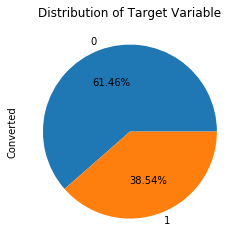

In [54]:
#Plotting pie chart to see the percentage of converted and non-converted leads
df['Converted'].value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("Distribution of Target Variable")
plt.show()

In [55]:
# Looking at the columns present in the dataframe after data cleaning
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
# Renaming some of the columns for proper readability
df.rename(columns={"Total Time Spent on Website": "TimeSpent", 
                   "What is your current occupation": "Occupation",
                   "A free copy of Mastering The Interview": "InterviewCopyRequested"},inplace=True)

In [57]:
df.shape

(9240, 11)

#### We have 11 columns and 9240 rows after data cleaning.

In [58]:
# Looking at the dataframe post data cleaning
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,TimeSpent,Page Views Per Visit,Occupation,Lead Profile,InterviewCopyRequested,Last Notable Activity
Lead Number,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,Other Leads,No,Modified
660728,API,Organic Search,No,0,5.0,674,2.5,Unemployed,Other Leads,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Potential Lead,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,Other Leads,No,Modified
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,Other Leads,No,Modified


## 3. Data Visualization

### Visualizing the categorical columns

In [59]:
# Creating a function to plot bar plots for the categorical columns
def PlotCategories(var):
    fig=plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.set_title('% Rate of converted leads for ' + '%s' %var)
    ax2.set_title('% Rate of non converted leads for '+'%s' %var)

    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('Percentage')
    ax2.set_ylabel('Percentage')

    cDf=pd.crosstab(df[var],df['Converted']).apply(lambda r: r*100/r.sum(), axis=1)
    dDf=cDf[1].sort_values(ascending=False)
    ndDf=cDf[0].sort_values(ascending=False)

    p1=sns.barplot(y=dDf.values,x=dDf.index.tolist(), ax=ax1)
    p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

    p2=sns.barplot(y=ndDf.values,x=ndDf.index.tolist(), ax=ax2)
    p2.set_xticklabels(p2.get_xticklabels(),rotation=90)

    for p in p1.patches:
        p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
    for p in p2.patches:
        p2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')

    fig.tight_layout()
    plt.show()

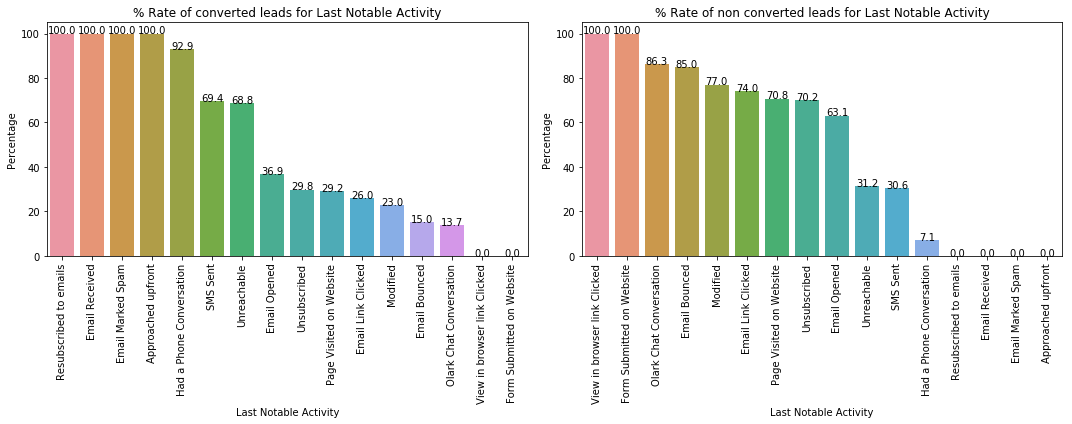

In [60]:
# Plotting the last notable activity column
PlotCategories('Last Notable Activity')

#### Inference: 
1. People who have resubscribed to emails, received emails, marked emails as spam, approached upfront, had a phone conversation and sent sms have a higher chance of being converted as a lead. 
2. The people who clicked on the link to view in browser,submitted form on website have the highest chance of not being converted followed by those whose last notable activity was Olark Chat conversation or email bounced.

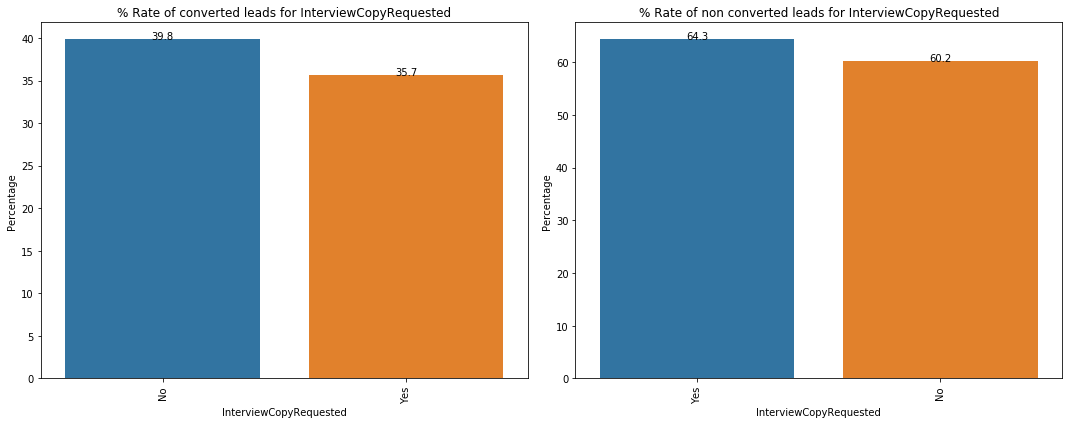

In [61]:
# Plotting the interview copy requested column
PlotCategories('InterviewCopyRequested')

#### Inference:
1. Those who have said no to an interview copy have a higher chance of getting converted to lead than those who have opted for a free copy of mastering the interview.

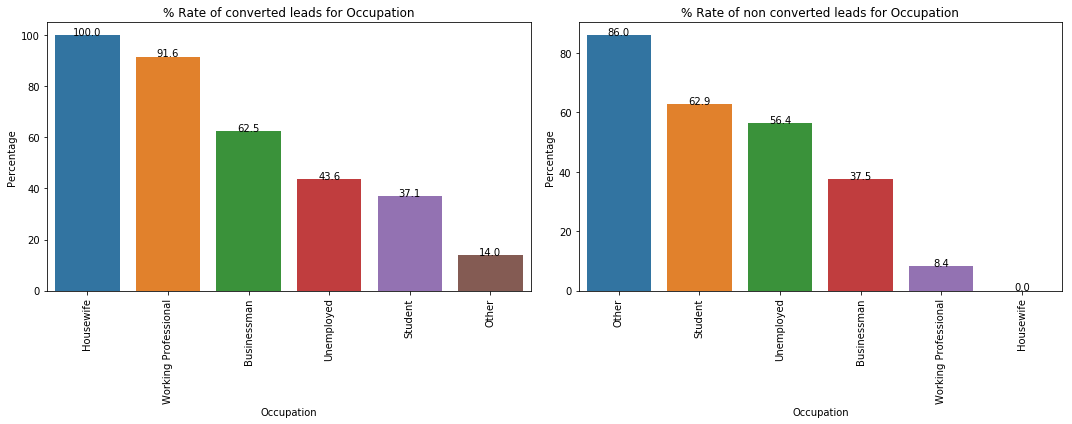

In [62]:
# Plotting the occupation column
PlotCategories('Occupation')

#### Inference:
1. Housewife, working professional and businessmen have a higher chance of being converted.
2. Students and Unemployed people have a lowest chance of being coverted.

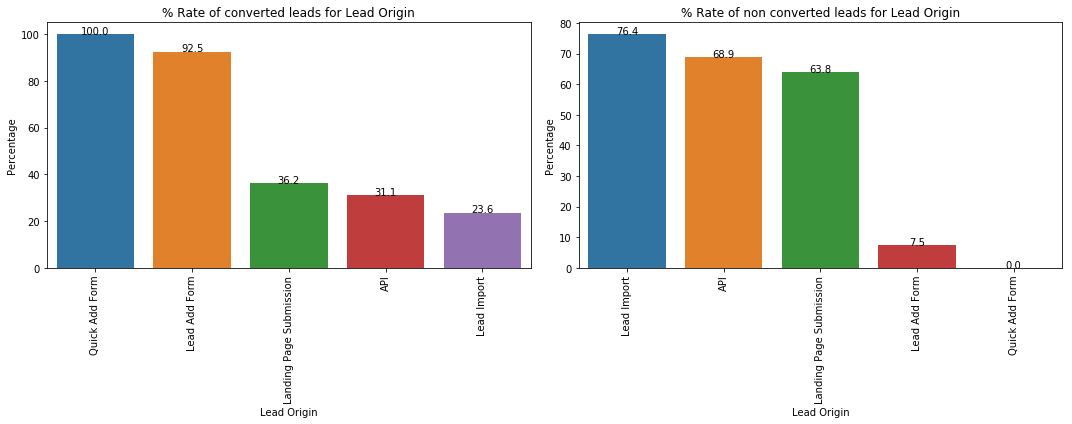

In [63]:
# Plotting the quick add form
PlotCategories('Lead Origin')

#### Inference: 
1. Those people whose lead origin is quick add form, lead add form have a higher change of being converted.
2. People for whom the lead origin is Lead Import, API and Landing Page submissions have the highest percentage of non-conversion.

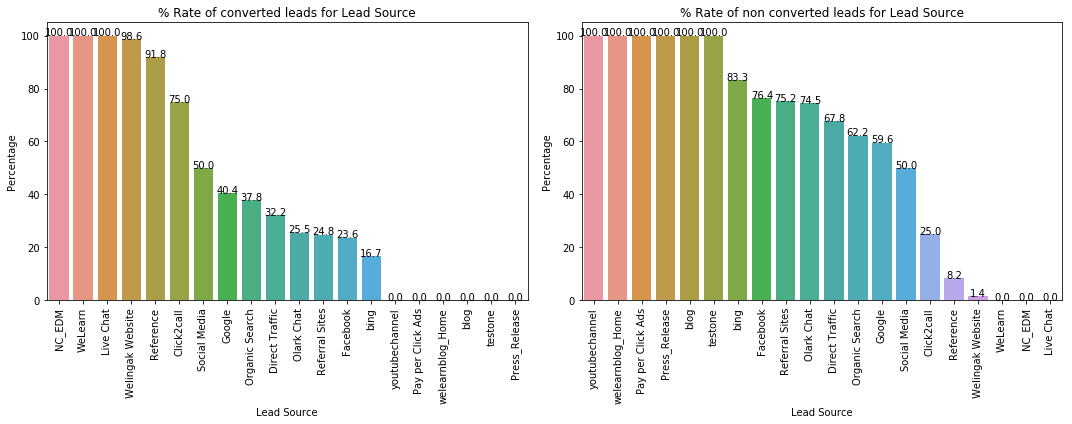

In [64]:
# Plotting the lead source
PlotCategories('Lead Source')

#### Inference:
1. If the source of the lead is NC_EDM, welearn, live chat, welingak website, reference, click2call there is a higher chance of lead conversion.
2. On the other hand, if the lead source indicates youtubechannel, welearnblog_Home, Pay Per Click Ads, Press Realease, blog or testtone then there is a higher chance of non-conversion.

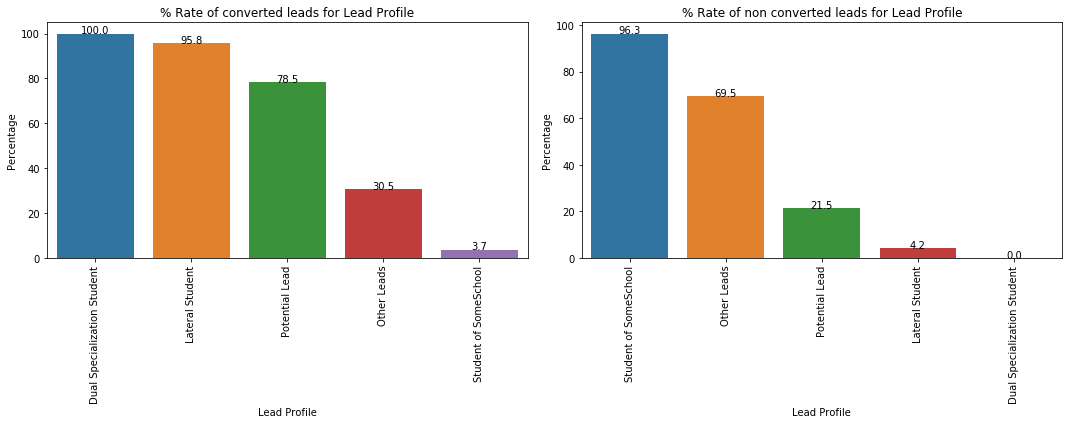

In [65]:
# Plotting the lead profile
PlotCategories('Lead Profile')

#### Inference:

1. Dual specialization Students, Lateral students, potential leads have a high probability of getting converted.

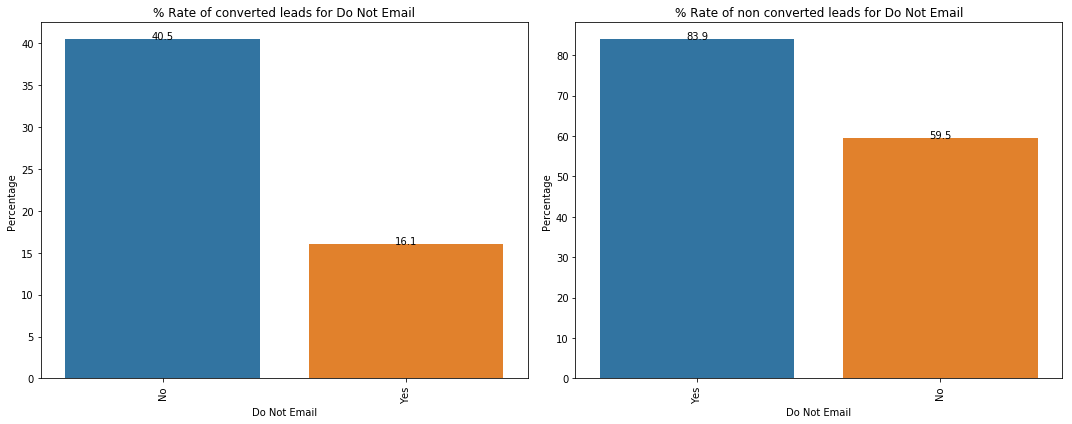

In [66]:
# Plotting do not email column
PlotCategories('Do Not Email')

#### Inference:
1. Those who have said No to do not email, have a higher chance of being converted to a lead.

### Visualizing the Numerical Columns

In [67]:
# Creating a function to plot the box plots of numerical columns
def PlotNumerical(var):
    
    fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(15,6))
    
    # Creating a box plot and distplot 
    ax[0].set_title('Box-plot for' + var, fontsize=10)
    ax[1].set_title('Distplot', fontsize=10)
    s1=sns.boxplot(x='Converted',y=var,data=df,ax=ax[0])
    converted_0 = df.loc[df['Converted'] == 0]
    converted_1 = df.loc[df['Converted'] == 1]
    s2=sns.distplot(converted_0[[var]],ax=ax[1])
    s2=sns.distplot(converted_1[[var]],ax=ax[1])
    plt.show()

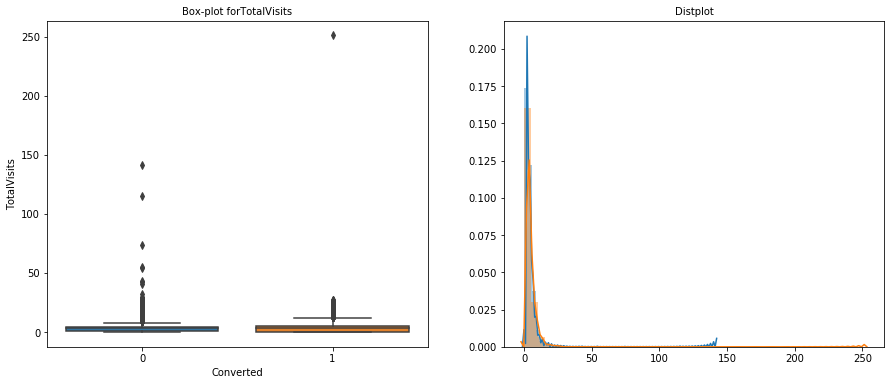

In [68]:
# Plotting TotalVisits column
PlotNumerical('TotalVisits')

There are some outliers which we need to handle.

In [69]:
# Removing outliers from the dataframe
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
df = df[((df['TotalVisits'] >= (Q1 - 1.5 * IQR))& (df['TotalVisits'] <= (Q3 + 1.5 * IQR)))]
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,TimeSpent,Page Views Per Visit,Occupation,Lead Profile,InterviewCopyRequested,Last Notable Activity
Lead Number,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,Other Leads,No,Modified
660728,API,Organic Search,No,0,5.0,674,2.5,Unemployed,Other Leads,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Potential Lead,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,Other Leads,No,Modified
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,Other Leads,No,Modified


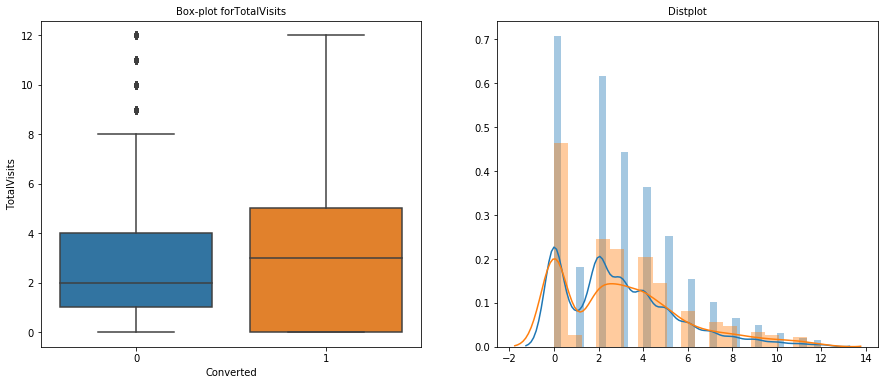

In [70]:
PlotNumerical('TotalVisits')

#### Inference:
1. The median value of Total visits for persons who have converted is higher than the ones who have not converted.

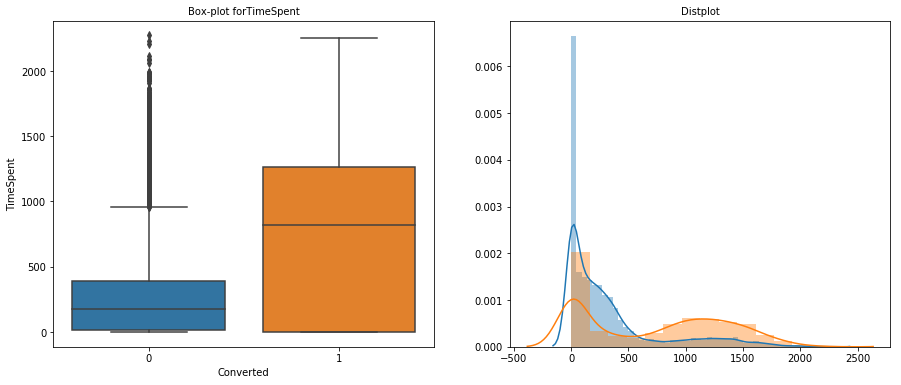

In [71]:
# Plotting the Time spent column
PlotNumerical('TimeSpent')

#### Inference:
1. We clearly see that the time spent by a person is highly correlated with the person being converted as a lead.Those who spend more time has a higher chance of being converted.

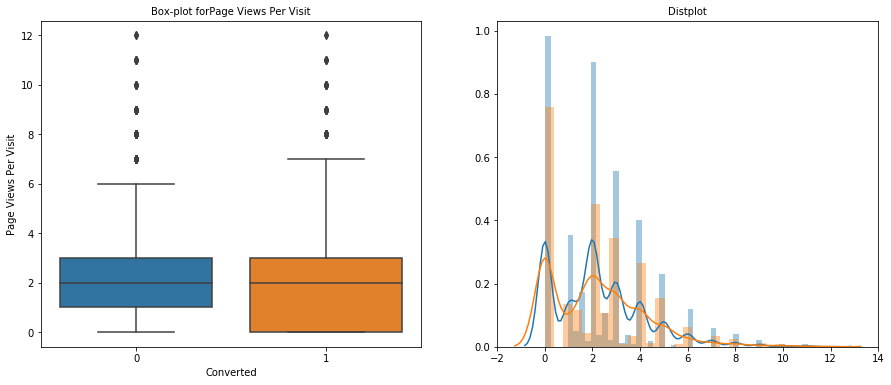

In [72]:
# Plotting the page views per visit column
PlotNumerical('Page Views Per Visit')

In [73]:
# Removing outliers from the "Page views per visit"  column
Q1 = df['Page Views Per Visit'].quantile(0.25)
Q3 = df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
df = df[((df['Page Views Per Visit'] >= (Q1 - 1.5 * IQR))& (df['Page Views Per Visit'] <= (Q3 + 1.5 * IQR)))]
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,TimeSpent,Page Views Per Visit,Occupation,Lead Profile,InterviewCopyRequested,Last Notable Activity
Lead Number,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,Other Leads,No,Modified
660728,API,Organic Search,No,0,5.0,674,2.5,Unemployed,Other Leads,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Potential Lead,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,Other Leads,No,Modified
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,Other Leads,No,Modified


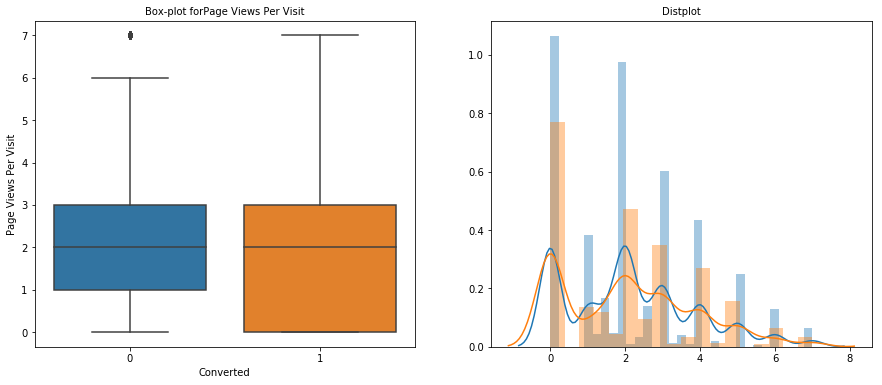

In [74]:
# Plotting the page views per visit column after removing outliers
PlotNumerical('Page Views Per Visit')

#### Inference:
1. We do not see any relationship of a lead conversion with that of person's page view per visit.

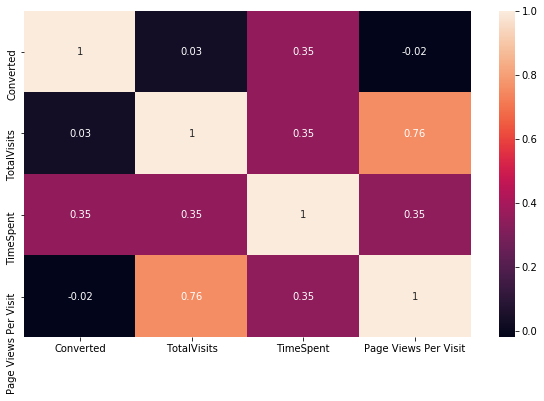

In [75]:
# checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

#### Inference:

1. Total visits is highly correlated with Page views per visit

<Figure size 720x432 with 0 Axes>

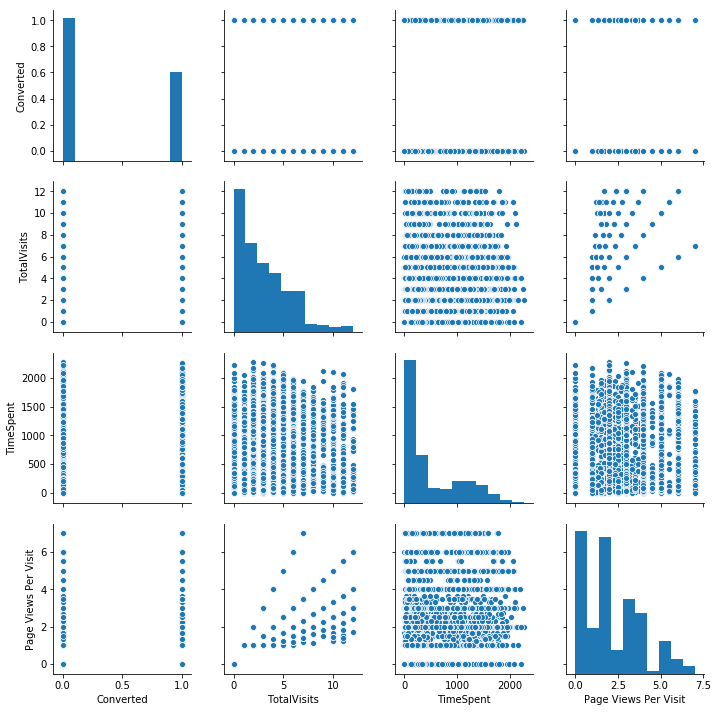

In [76]:
#Plotting a pairplot
plt.figure(figsize=(10, 6))
sns.pairplot(df)

In [77]:
# Looking at the columns
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'TimeSpent', 'Page Views Per Visit', 'Occupation',
       'Lead Profile', 'InterviewCopyRequested', 'Last Notable Activity'],
      dtype='object')

#### We need to create dummy variables for all categorical columns such that they can be used in the model.

In [78]:
# Creating dummies for categorical columns
categoricalCols=['Lead Origin', 'Lead Profile','Lead Source', 'Do Not Email',
                 'Occupation', 'InterviewCopyRequested', 'Last Notable Activity']
dummies = pd.get_dummies(df[categoricalCols], drop_first = True)

In [79]:
# Merging the dummies to the dataframe
df = pd.concat([df, dummies], axis = 1)

# Dropping the actual categorical columns
df.drop(columns=categoricalCols,inplace=True)

df.shape

(8844, 53)

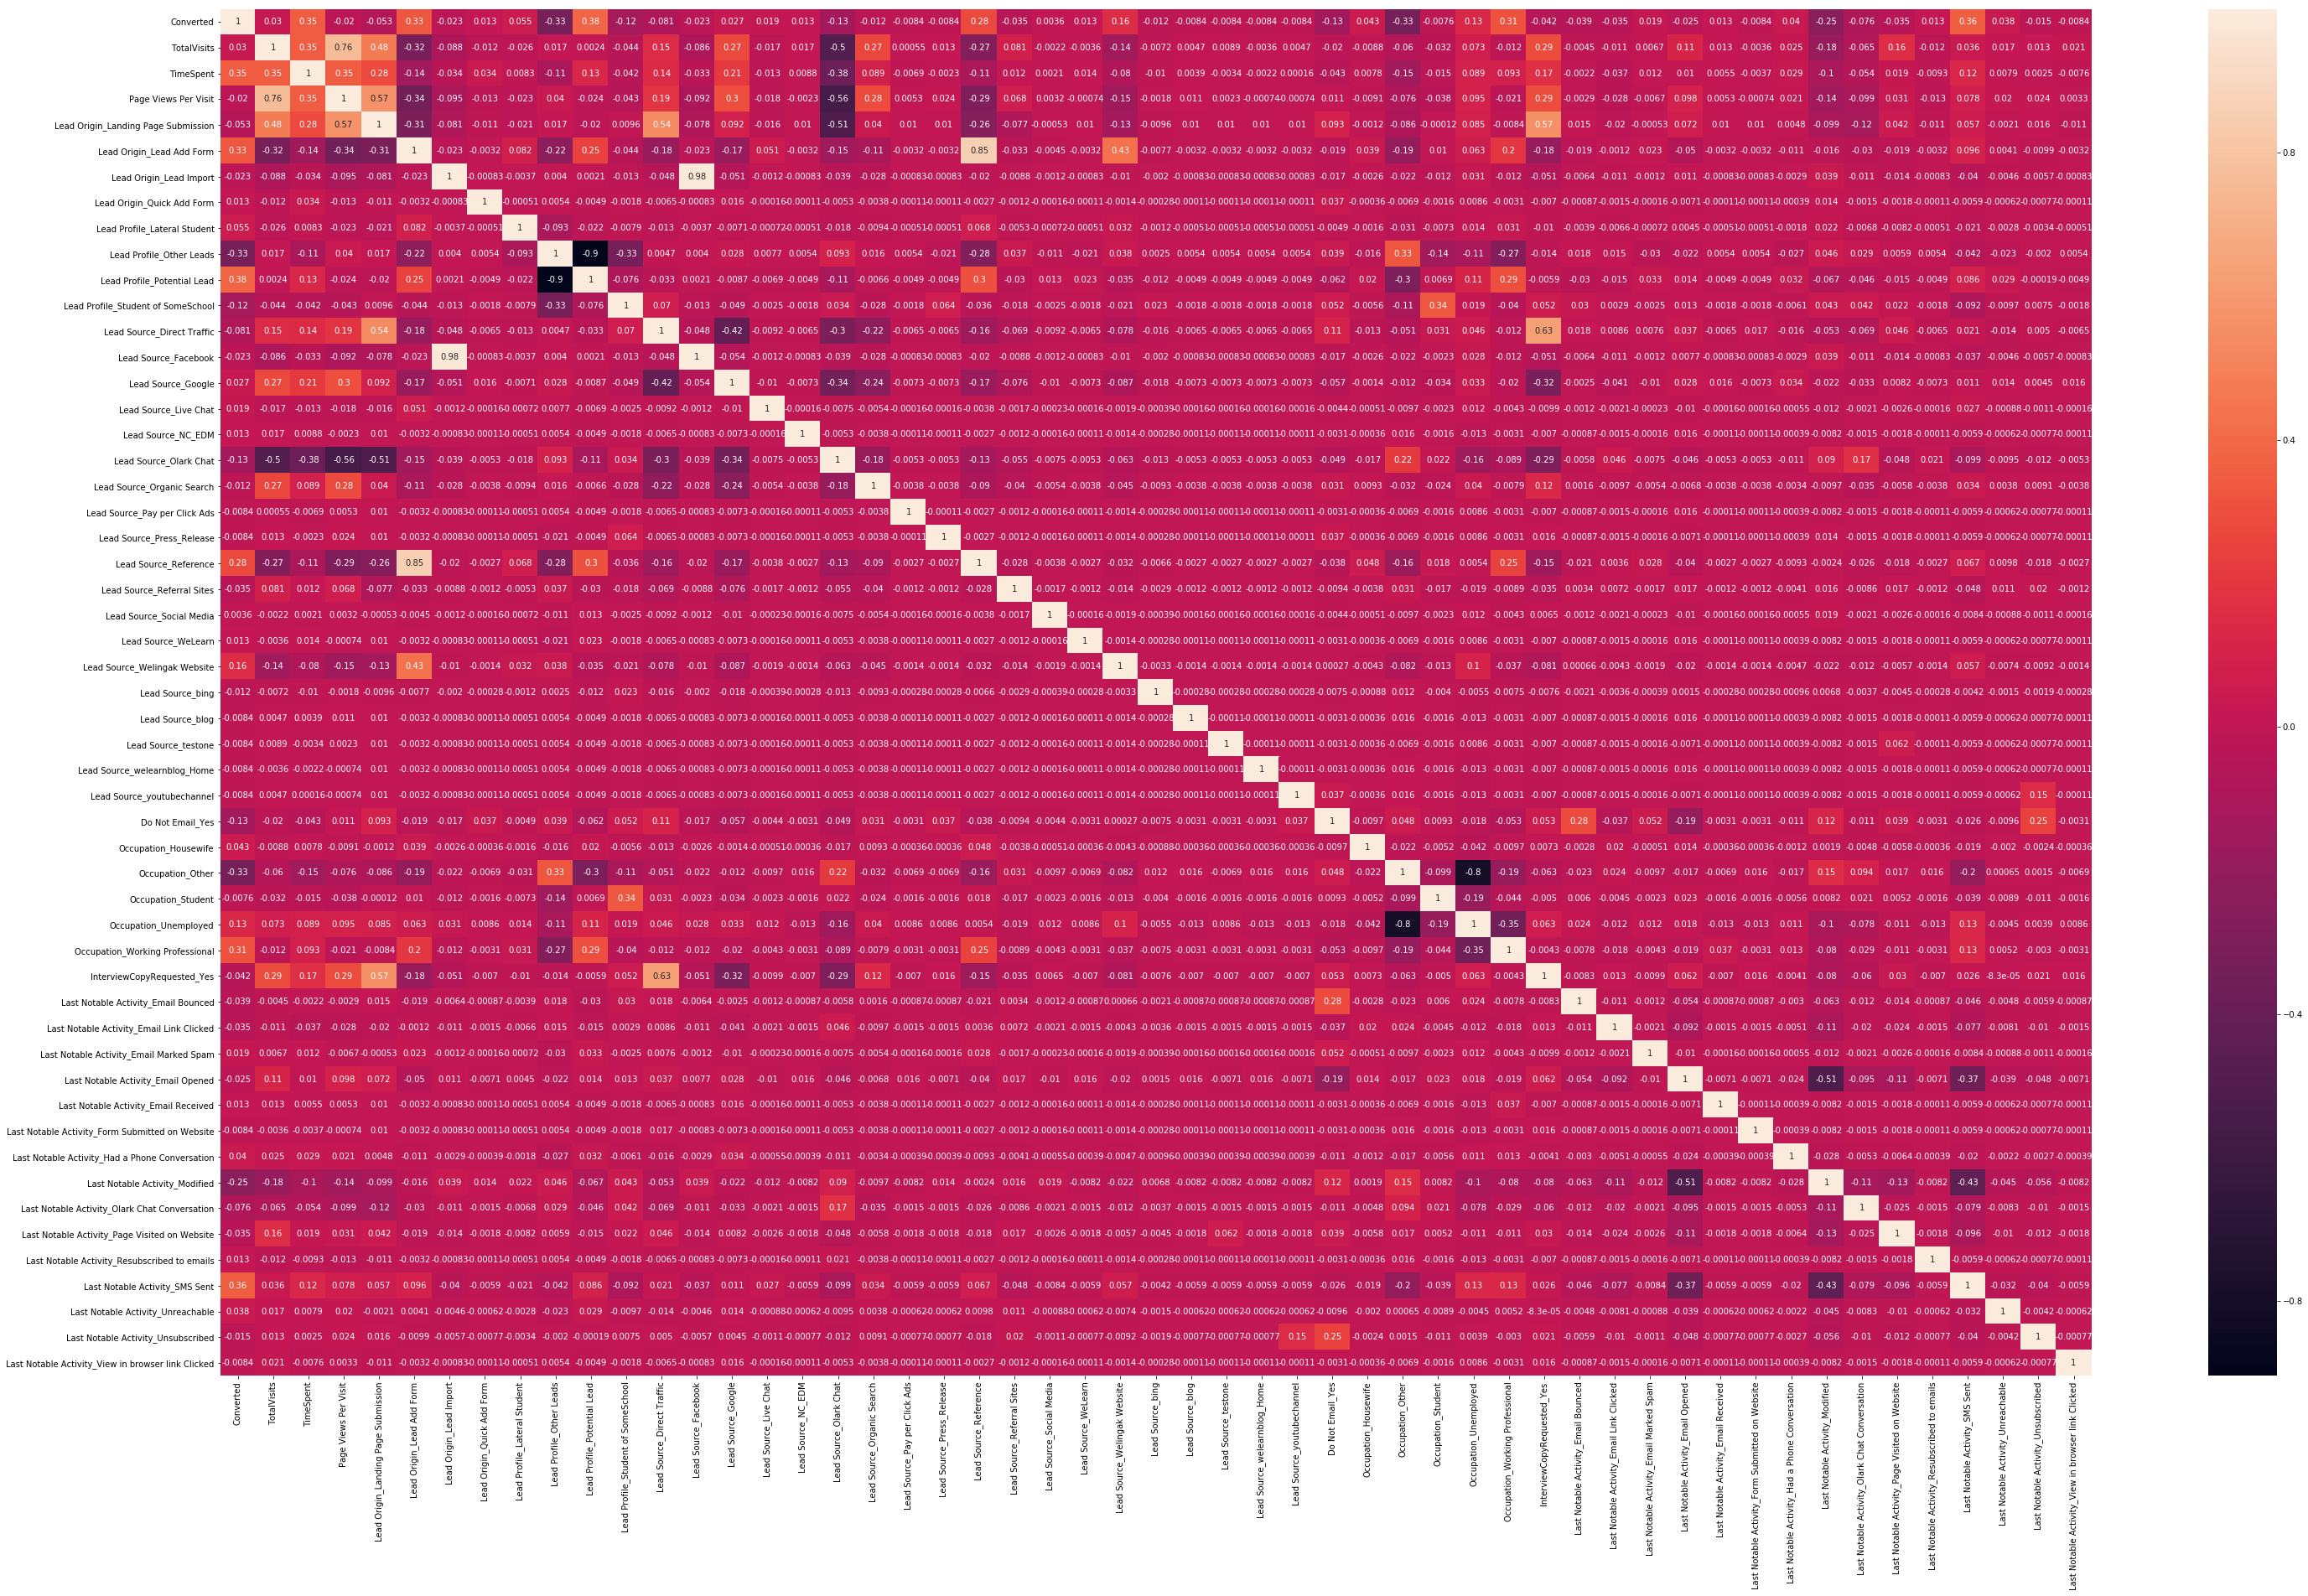

In [80]:
# Visualising data usign heatmap after creating dummy variables.
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Inference:

1. We can see that there is hgih correlation between some variables. However, we will not drop these features at this stage but instead opt for RFE to choose our top 15 features.

## Step 4: Splitting the Data into Training and Testing Sets

In [81]:
#Putting feature variables to X
X = df.drop(['Converted'], axis=1)

X.head()

,TotalVisits,TimeSpent,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,InterviewCopyRequested_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
660727,2.0,1532,2.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
660719,1.0,305,1.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660681,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [82]:
#Putting response variable to y
y = df['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [83]:
#Splitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [84]:
# Scaling all the numeric columns

scaler = StandardScaler()

X_train[['TotalVisits', 'TimeSpent', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'TimeSpent', 'Page Views Per Visit']])

X_train.head()

C:\Users\shashidhar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shashidhar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,TotalVisits,TimeSpent,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,InterviewCopyRequested_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
587564,-0.735243,-0.693150,-0.637463,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
594671,-0.735243,-0.344847,-0.637463,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
593834,-0.341987,-0.383344,-0.070263,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
622631,0.837781,2.351747,1.631338,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
600899,0.051269,-0.220192,0.496937,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Step 6: Model Building

In [85]:
# Logistic regression model - Running our first training model

logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6142
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Nov 2019   Deviance:                          nan
Time:                        15:49:51   Pearson chi2:                 6.10e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                1.17e+14   7.17e+07   1.63e+06      0.000    1.17e+14    1.17e+14
TotalVisits                                         1.607e+14   1.43e+06   1.13e+08      0.000    1.61e+14    1.61e+14
TimeSpent                                           6.326e+14   9.73e+05    6.5e+08      0.000    6.33e+14    6.33e+14
Page Views Per Visit                               -1.274e+14   1.54e+06  -8.26e+07      0.000   -1.27e+14   -1.27e+14
Lead Origin_Landing Page Submission                -8.462e+13   2.77e+06  -3.06e+07      0.000   -8.46e+13   -8.46e+13
Lead Origin_Lead Add Form                           1.157e+15   1.35e+07   8.55e+07      0.000    1.16e+15    1.16e+15
Lead Origin_Lead Import                            -1.422e+14    4.8e+07  -2.96e+06      0.000   -1.42e+14   -1.42e+14
Lead Origin_Quick Add Form                           2.87e+15   6.73e+07   4.26e+07      0.000    2.87e+15    2.87e+15
Lead Profile_Lateral Student                       -1.287e+15   2.63e+07  -4.89e+07      0.000   -1.29e+15   -1.29e+15
Lead Profile_Other Leads                           -4.101e+15   1.69e+07  -2.43e+08      0.000    -4.1e+15    -4.1e+15
Lead Profile_Potential Lead                        -4.339e+15    1.7e+07  -2.56e+08      0.000   -4.34e+15   -4.34e+15
Lead Profile_Student of SomeSchool                 -4.856e+15   1.78e+07  -2.74e+08      0.000   -4.86e+15   -4.86e+15
Lead Source_Direct Traffic                          4.614e+15   6.85e+07   6.73e+07      0.000    4.61e+15    4.61e+15
Lead Source_Facebook                                 4.79e+15   8.35e+07   5.73e+07      0.000    4.79e+15    4.79e+15
Lead Source_Google                                  4.837e+15   6.85e+07   7.07e+07      0.000    4.84e+15    4.84e+15
Lead Source_Live Chat                               9.349e+15   8.23e+07   1.14e+08      0.000    9.35e+15    9.35e+15
Lead Source_NC_EDM                                  8.947e+15   9.59e+07   9.32e+07      0.000    8.95e+15    8.95e+15
Lead Source_Olark Chat                              4.354e+15   6.85e+07   6.35e+07      0.000    4.35e+15    4.35e+15
Lead Source_Organic Search                          4.749e+15   6.85e+07   6.93e+07      0.000    4.75e+15    4.75e+15
Lead Source_Pay per Click Ads                       1.015e+15   9.59e+07   1.06e+07      0.000    1.01e+15    1.01e+15
Lead Source_Press_Release                             41.1275   5.12e-07   8.04e+07      0.000      41.127      41.127
Lead Source_Reference                               5.465e+15   6.72e+07   8.13e+07      0.000    5.47e+15    5.47e+15
Lead Source_Referral Sites                          4.829e+15   6.89e+07   7.01e+07      0.000    4.83e+15    4.83e+15
Lead Source_Social Media                            9.086e+15   9.59

### Feature Selection using RFE

In [86]:
logreg = LogisticRegression()

In [87]:
# Feature selection using RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('TimeSpent', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 29),
 ('Lead Origin_Quick Add Form', False, 11),
 ('Lead Profile_Lateral Student', False, 4),
 ('Lead Profile_Other Leads', True, 1),
 ('Lead Profile_Potential Lead', False, 7),
 ('Lead Profile_Student of SomeSchool', True, 1),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Live Chat', False, 26),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Pay per Click Ads', False, 30),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak W

In [89]:
#The top 15 columns selected usign RFE 

col = X_train.columns[rfe.support_]
col

Index(['TimeSpent', 'Lead Origin_Lead Add Form', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Occupation_Housewife', 'Occupation_Other',
       'Occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

#### Assessing the model with StatsModels using columns obtained using RFE

### Model 1

In [90]:
# Builing the model from the columns obtained using RFE
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6174
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2355.0
Date:                Sun, 17 Nov 2019   Deviance:                       4709.9
Time:                        15:49:53   Pearson chi2:                 6.59e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.0697      0.095     -0.736      0.462      -0.255       0.116
TimeSpent                                          1.1341      0.043     26.436      0.000       1.050       1.218
Lead Origin_Lead Add Form                          3.3143      0.213     15.582      0.000       2.897       3.731
Lead Profile_Other Leads                          -1.5368      0.102    -15.026      0.000      -1.737      -1.336
Lead Profile_Student of SomeSchool                -4.0335      0.494     -8.163      0.000      -5.002      -3.065
Lead Source_Olark Chat                             1.1989      0.106     11.269      0.000       0.990       1.407
Lead Source_Welingak Website                       3.2524      1.034      3.146      0.002       1.226       5.279
Do Not Email_Yes                                  -1.5528      0.193     -8.058      0.000      -1.930      -1.175
Occupation_Housewife                              24.1288   2.55e+04      0.001      0.999      -5e+04       5e+04
Occupation_Other                                  -0.8907      0.093     -9.621      0.000      -1.072      -0.709
Occupation_Working Professional                    2.0557      0.184     11.180      0.000       1.695       2.416
Last Notable Activity_Had a Phone Conversation    23.3510   2.25e+04      0.001      0.999   -4.42e+04    4.42e+04
Last Notable Activity_Resubscribed to emails      25.8583   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Notable Activity_SMS Sent                     1.7635      0.085     20.782      0.000       1.597       1.930
Last Notable Activity_Unreachable                  1.7273      0.535      3.231      0.001       0.679       2.775
Last Notable Activity_Unsubscribed                 1.6995      0.517      3.285      0.001       0.686       2.713
==================================================================================================================
"""

There are some columns with high p-value. We need to drop one by one.

In [91]:
# Looking at the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.13
2,Lead Origin_Lead Add Form,1.46
3,Lead Profile_Other Leads,1.40
1,TimeSpent,1.28
6,Lead Source_Welingak Website,1.27
5,Lead Source_Olark Chat,1.26
9,Occupation_Other,1.23
4,Lead Profile_Student of SomeSchool,1.18
10,Occupation_Working Professional,1.15
7,Do Not Email_Yes,1.09


All the vif values look good below 5.

#### The p value for Last Notable Activity_Resubscribed to emails is very high at 1.000 and hence we will drop the column.

### Model 2

In [92]:
# Dropping the Last Notable Activity_Resubscribed to emails and building the model again

col = col.drop('Last Notable Activity_Resubscribed to emails', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6175
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2357.3
Date:                Sun, 17 Nov 2019   Deviance:                       4714.7
Time:                        15:49:54   Pearson chi2:                 6.59e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.0701      0.095     -0.740      0.459      -0.255       0.115
TimeSpent                                          1.1336      0.043     26.433      0.000       1.050       1.218
Lead Origin_Lead Add Form                          3.3145      0.213     15.584      0.000       2.898       3.731
Lead Profile_Other Leads                          -1.5367      0.102    -15.027      0.000      -1.737      -1.336
Lead Profile_Student of SomeSchool                -4.0342      0.494     -8.165      0.000      -5.003      -3.066
Lead Source_Olark Chat                             1.2032      0.106     11.319      0.000       0.995       1.412
Lead Source_Welingak Website                       3.2523      1.034      3.146      0.002       1.226       5.279
Do Not Email_Yes                                  -1.5530      0.193     -8.061      0.000      -1.931      -1.175
Occupation_Housewife                              24.1288   2.55e+04      0.001      0.999      -5e+04       5e+04
Occupation_Other                                  -0.8861      0.092     -9.583      0.000      -1.067      -0.705
Occupation_Working Professional                    2.0558      0.184     11.181      0.000       1.695       2.416
Last Notable Activity_Had a Phone Conversation    23.3512   2.25e+04      0.001      0.999   -4.42e+04    4.42e+04
Last Notable Activity_SMS Sent                     1.7622      0.085     20.773      0.000       1.596       1.928
Last Notable Activity_Unreachable                  1.7251      0.534      3.228      0.001       0.678       2.772
Last Notable Activity_Unsubscribed                 1.6980      0.517      3.283      0.001       0.684       2.712
==================================================================================================================
"""

In [93]:
# Looking at the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.13
2,Lead Origin_Lead Add Form,1.46
3,Lead Profile_Other Leads,1.40
1,TimeSpent,1.28
6,Lead Source_Welingak Website,1.27
5,Lead Source_Olark Chat,1.26
9,Occupation_Other,1.23
4,Lead Profile_Student of SomeSchool,1.18
10,Occupation_Working Professional,1.15
7,Do Not Email_Yes,1.09


#### Occupation_Housewife has a very high p value at 0.999, hence we will drop the column.

### Model 3

In [94]:
# Droping the Occupation_Housewife due to high p-value
col = col.drop('Occupation_Housewife', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6176
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.3
Date:                Sun, 17 Nov 2019   Deviance:                       4724.6
Time:                        15:49:54   Pearson chi2:                 6.60e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.0642      0.094     -0.679      0.497      -0.249       0.121
TimeSpent                                          1.1313      0.043     26.408      0.000       1.047       1.215
Lead Origin_Lead Add Form                          3.3253      0.212     15.656      0.000       2.909       3.742
Lead Profile_Other Leads                          -1.5344      0.102    -15.024      0.000      -1.735      -1.334
Lead Profile_Student of SomeSchool                -4.0366      0.494     -8.170      0.000      -5.005      -3.068
Lead Source_Olark Chat                             1.1966      0.106     11.269      0.000       0.988       1.405
Lead Source_Welingak Website                       3.2332      1.034      3.127      0.002       1.207       5.259
Do Not Email_Yes                                  -1.5568      0.193     -8.081      0.000      -1.934      -1.179
Occupation_Other                                  -0.8901      0.092     -9.634      0.000      -1.071      -0.709
Occupation_Working Professional                    2.0497      0.184     11.153      0.000       1.689       2.410
Last Notable Activity_Had a Phone Conversation    22.3444   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
Last Notable Activity_SMS Sent                     1.7563      0.085     20.722      0.000       1.590       1.922
Last Notable Activity_Unreachable                  1.7199      0.534      3.219      0.001       0.673       2.767
Last Notable Activity_Unsubscribed                 1.6965      0.517      3.280      0.001       0.683       2.710
==================================================================================================================
"""

In [95]:
# Looking at the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.12
2,Lead Origin_Lead Add Form,1.45
3,Lead Profile_Other Leads,1.40
1,TimeSpent,1.28
5,Lead Source_Olark Chat,1.26
6,Lead Source_Welingak Website,1.26
8,Occupation_Other,1.23
4,Lead Profile_Student of SomeSchool,1.18
9,Occupation_Working Professional,1.15
7,Do Not Email_Yes,1.09


#### Last Notable Activity_Had a Phone Conversation has a very high p-value at 0.999, hence we will drop the column.

### Model 4

In [96]:
# Droping the Last Notable Activity_Had a Phone Conversation due to high p-value

col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6177
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2367.0
Date:                Sun, 17 Nov 2019   Deviance:                       4734.0
Time:                        15:49:54   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.0543      0.094     -0.576      0.565      -0.239       0.131
TimeSpent                              1.1305      0.043     26.428      0.000       1.047       1.214
Lead Origin_Lead Add Form              3.3183      0.212     15.625      0.000       2.902       3.734
Lead Profile_Other Leads              -1.5370      0.102    -15.069      0.000      -1.737      -1.337
Lead Profile_Student of SomeSchool    -4.0442      0.494     -8.186      0.000      -5.012      -3.076
Lead Source_Olark Chat                 1.1913      0.106     11.232      0.000       0.983       1.399
Lead Source_Welingak Website           3.2339      1.034      3.128      0.002       1.208       5.260
Do Not Email_Yes                      -1.5599      0.193     -8.099      0.000      -1.937      -1.182
Occupation_Other                      -0.8939      0.092     -9.681      0.000      -1.075      -0.713
Occupation_Working Professional        2.0545      0.183     11.197      0.000       1.695       2.414
Last Notable Activity_SMS Sent         1.7508      0.085     20.668      0.000       1.585       1.917
Last Notable Activity_Unreachable      1.7144      0.535      3.207      0.001       0.667       2.762
Last Notable Activity_Unsubscribed     1.6943      0.517      3.276      0.001       0.681       2.708
======================================================================================================
"""

In [97]:
##### Looking at the vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.11
2,Lead Origin_Lead Add Form,1.45
3,Lead Profile_Other Leads,1.40
1,TimeSpent,1.28
5,Lead Source_Olark Chat,1.26
6,Lead Source_Welingak Website,1.26
8,Occupation_Other,1.23
4,Lead Profile_Student of SomeSchool,1.18
9,Occupation_Working Professional,1.15
7,Do Not Email_Yes,1.09


All the variables have p-values less than 0.05 and the vifs are less than 5. So, we can consider all the columns to be signigicant.

In [98]:
#Getting predicted values on train set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred[:10]

array([0.01917362, 0.12119086, 0.43193912, 0.54325831, 0.13701907,
       0.98243011, 0.15347087, 0.03930202, 0.1992651 , 0.39303731])

#### Creating a dataframe with the actual converted values and the predicted Conversion probabilities.

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber
0,0,0.019174,587564
1,0,0.121191,594671
2,0,0.431939,593834
3,1,0.543258,622631
4,0,0.137019,600899


## Step 7: Finding Optimal Cutoff Point

In [100]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.019174,587564,1,0,0,0,0,0,0,0,0,0
1,0,0.121191,594671,1,1,0,0,0,0,0,0,0,0
2,0,0.431939,593834,1,1,1,1,1,0,0,0,0,0
3,1,0.543258,622631,1,1,1,1,1,1,0,0,0,0
4,0,0.137019,600899,1,1,0,0,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability', 'TP','TN','FP','FN',
                                     'Accuracy','Sensitivity','Specificity', 
                                     'Precision', 'Recall'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))   
    accuracy = (cm[0,0]+cm[1,1])/total
    
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    
    speci = TN / float(TN+FP)
    sensi = TP / float(TP+FN)
    
    precision = TP / float(TP+FP)
    recall = TP / float(TP+FN)
    
    cutoff_df.loc[i] =[ i ,TP, TN, FP, FN, accuracy,sensi,speci,precision,recall]

print(cutoff_df)

     Probability      TP      TN      FP      FN  Accuracy  Sensitivity  \
0.0          0.0  2341.0     0.0  3849.0     0.0  0.378191     1.000000   
0.1          0.1  2259.0  2048.0  1801.0    82.0  0.695800     0.964972   
0.2          0.2  2103.0  2845.0  1004.0   238.0  0.799354     0.898334   
0.3          0.3  1999.0  3028.0   821.0   342.0  0.812116     0.853909   
0.4          0.4  1842.0  3275.0   574.0   499.0  0.826656     0.786843   
0.5          0.5  1701.0  3432.0   417.0   640.0  0.829241     0.726613   
0.6          0.6  1490.0  3566.0   283.0   851.0  0.816801     0.636480   
0.7          0.7  1303.0  3658.0   191.0  1038.0  0.801454     0.556600   
0.8          0.8  1095.0  3733.0   116.0  1246.0  0.779968     0.467749   
0.9          0.9   811.0  3794.0    55.0  1530.0  0.743942     0.346433   

     Specificity  Precision    Recall  
0.0     0.000000   0.378191  1.000000  
0.1     0.532086   0.556404  0.964972  
0.2     0.739153   0.676859  0.898334  
0.3     0.7866

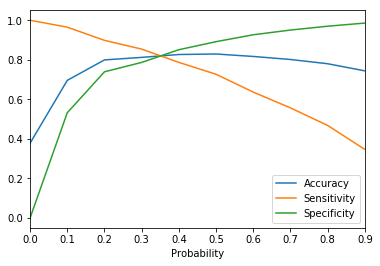

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

Sensitivity measures that out of the leads that actually converted, what proportion was correctly identified as such. <br>
Specificity measures the proportion of negatives which are correctly identified as such.

From the curve above, 0.35 is the optimum point to take it as a cutoff probability if we want a trade-off between specificity and sensitivity

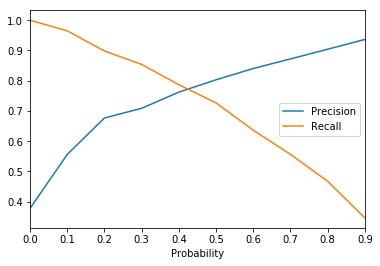

In [103]:
# Let's plot precision recall curve for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Precision','Recall'])
plt.show()

Precision is the proportion of hot leads whom we classified as 1, actually converted. <br>
Recall is out of those that converted, what proportion were classified that way.

Our business objective is to select a cutoff that gives us at least 80% precision. <br>
We have calculated the precision rate for all the probability values starting from 0.1 to 0.9 in the dataframe cutoff_df above <br>
We see that at a probability of 0.5, we get a Precision of 80% <br>
Higher cutoff values will give us a high precision, but the number of hot leads generated and the number of True positives will also decrease. In other words, the recall will decrease.<br>
We need a cutoff where we get high precision with decent number of True Positives.

#### Thus selecting 0.5 as the final cutoff value

In [104]:
# Assigning the final predicted value based on 0.5 cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.5 else 0)

# Assigning Lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.019174,587564,1,0,0,0,0,0,0,0,0,0,0,2
1,0,0.121191,594671,1,1,0,0,0,0,0,0,0,0,0,12
2,0,0.431939,593834,1,1,1,1,1,0,0,0,0,0,0,43
3,1,0.543258,622631,1,1,1,1,1,1,0,0,0,0,1,54
4,0,0.137019,600899,1,1,0,0,0,0,0,0,0,0,0,14


In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8292407108239095

In [106]:
#Looking at the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3432,  417],
       [ 640, 1701]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7266125587355831

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8916601714731099

In [110]:
# Precision
TP / float(TP+FP)

0.8031161473087819

In [111]:
# Recall
TP / float(TP+FN)

0.7266125587355831

## Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
# ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

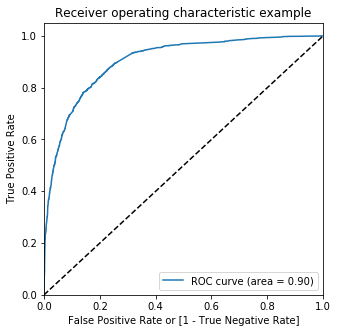

In [113]:
# Plotting the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### We get an AUC score of 0.9, which denotes that our model has good accuracy.

## Step 9: Making prediction on test

In [114]:
# Scaling the numeric columns on test data
X_test[['TotalVisits', 'TimeSpent', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'TimeSpent', 'Page Views Per Visit']])

C:\Users\shashidhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [115]:
# We use those columns that were used to create the model in train data
X_test = X_test[col]
X_test.head()

,TimeSpent,Lead Origin_Lead Add Form,Lead Profile_Other Leads,Lead Profile_Student of SomeSchool,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Occupation_Other,Occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,
631647,0.078615,1,1,0,0,0,0,0,0,0,0,0
624114,0.991534,0,1,0,0,0,0,0,0,1,0,0
640149,-0.300851,0,1,0,0,0,0,0,0,1,0,0
612862,-0.876467,0,1,0,1,0,0,1,0,0,0,0
583307,1.631311,0,1,0,0,0,0,0,0,0,0,0


In [116]:
# Predicting the probabilities on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm).values.reshape(-1)
y_test_pred[:5]

array([0.86006261, 0.78252047, 0.45495189, 0.0923861 , 0.56289788])

In [117]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1['final_predicted'] = y_pred_1[0].map(lambda x: 1 if x > 0.5 else 0) #Using cutoff as 0.5
y_pred_1.reset_index(inplace=True)
y_pred_1.drop(0,axis=1,inplace=True)
y_pred_1["Conversion_prob"]=y_test_pred
y_pred_1.head()

,index,final_predicted,Conversion_prob
0,0,1,0.860063
1,1,1,0.782520
2,2,0,0.454952
3,3,0,0.092386
4,4,1,0.562898


In [118]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head()

,Converted
0,1
1,1
2,1
3,0
4,1


In [119]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Assigning the lead score
y_pred_final['Lead_Score'] = y_pred_final.Conversion_prob.map( lambda x: round(x*100))

# Printing the data frame
y_pred_final.head()

,Converted,index,final_predicted,Conversion_prob,Lead_Score
0,1,0,1,0.860063,86
1,1,1,1,0.782520,78
2,1,2,0,0.454952,45
3,0,3,0,0.092386,9
4,1,4,1,0.562898,56


In [120]:
# Calculating the accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8198944988696307

In [121]:
# Creating the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1416,  186],
       [ 292,  760]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity
test_Sensitivity = TP / float(TP+FN)
test_Sensitivity

0.7224334600760456

In [124]:
# Let us calculate specificity
test_Specificity = TN / float(TN+FP)
test_Specificity

0.8838951310861424

In [125]:
# Precision
test_Precision = TP / float(TP+FP)
test_Precision

0.8033826638477801

In [126]:
# Recall
test_Recall = TP / float(TP+FN)
test_Recall

0.7224334600760456

In [127]:
# Summing up all the metrics in a single dataframe
pd.DataFrame({'Metric':['Sensitivity','Specificity','Precision','Recall'],
              'Score at 0.5 cutoff':[test_Sensitivity,test_Specificity,test_Precision,test_Recall]})

,Metric,Score at 0.5 cutoff
0,Sensitivity,0.722433
1,Specificity,0.883895
2,Precision,0.803383
3,Recall,0.722433


#### We see that in the train data also, we get a Precision of 80% on using 0.5 as the cutoff value

#### SELECTION OF TOP FEATURES

In [128]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params=pd.DataFrame(new_params)
new_params.columns=["Coefficients"]
new_params

,Coefficients
TimeSpent,1.13
Lead Origin_Lead Add Form,3.32
Lead Profile_Other Leads,-1.54
Lead Profile_Student of SomeSchool,-4.04
Lead Source_Olark Chat,1.19
Lead Source_Welingak Website,3.23
Do Not Email_Yes,-1.56
Occupation_Other,-0.89
Occupation_Working Professional,2.05
Last Notable Activity_SMS Sent,1.75


In [129]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params.sort_values(by='Coefficients',ascending=False)

feature_importance

,Coefficients
Lead Origin_Lead Add Form,3.32
Lead Source_Welingak Website,3.23
Occupation_Working Professional,2.05
Last Notable Activity_SMS Sent,1.75
Last Notable Activity_Unreachable,1.71
Last Notable Activity_Unsubscribed,1.69
Lead Source_Olark Chat,1.19
TimeSpent,1.13
Occupation_Other,-0.89
Lead Profile_Other Leads,-1.54


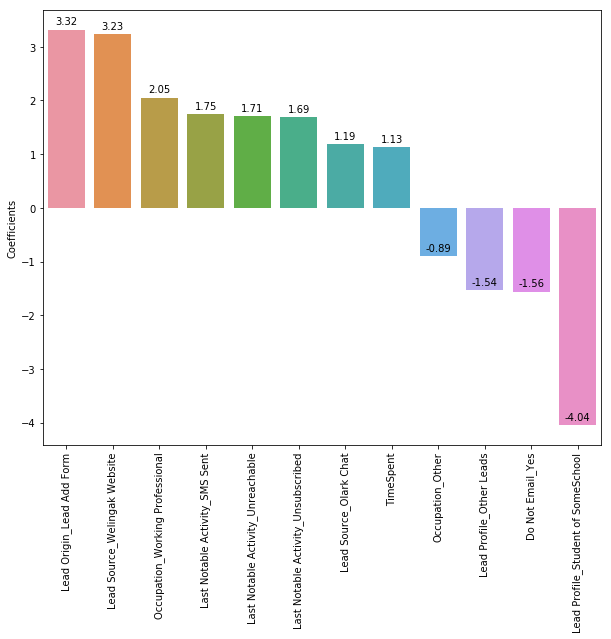

In [130]:
# Plotting all the features with decreasing order of coefficients
fig = plt.figure(figsize = (10,8))

p1=sns.barplot(x=feature_importance.index,y=feature_importance["Coefficients"])
plt.xticks(rotation='vertical')
for p in p1.patches:
        p1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')

#### CONCLUSION:

Leads having a lead score of 50 and above should be considered as Hot leads and the sales team can focus on these leads as they are more likely to convert. 

The top three variables contributing most towards the probability of lead generation are: <br>
1. Lead Origin_Lead Add Form
2. Lead Source_Welingak Website
3. Occupation_Working Professional <br>

The top 3 variables that the company should focus more in order to increase their lead conversion are: <br>
1. Lead Profile_Student of SomeSchool
2. Do Not Email_Yes
3. Lead Profile_Other Leads